# Visualize Gold Data 

This notebook summarizes and visualizes model ready data for one basin (Chelan).

# Step 0 - Prepare the Notebook 

In [15]:
import pandas as pd
import boto3
import s3fs
import xarray as xr
import matplotlib.pyplot as plt
import io
import requests
from io import StringIO

# Step 1 - Upload "Model Ready" Data Produced by Frosty Dawgs Pipeline

In [16]:
# def some functions to get data from S3

def s3_to_df(bucket_name, file_name):
    s3_path = f"s3://{bucket_name}/{file_name}"
    fs = s3fs.S3FileSystem(anon=False)
    with fs.open(s3_path) as f:
        ds = xr.open_dataset(f)
        ds.load()
    return ds

def s3_to_df(file_name, bucket_name):
    """
    Loads a CSV file from an S3 bucket into a pandas DataFrame.

    Parameters:
        file_name (str): The name of the CSV file in the S3 bucket.
        bucket_name (str): The name of the S3 bucket.

    Returns:
        pd.DataFrame: A pandas DataFrame containing the data from the CSV file.
    """
    s3 = boto3.client('s3')
    response = s3.get_object(Bucket=bucket_name, Key=file_name)
    content = response['Body'].read().decode('utf-8')
    df = pd.read_csv(StringIO(content))
    return df

In [29]:
# upload the data from S3 
bucket_name = "dawgs-model-ready"

huc_id = "17020009"  
huc_lev = "Huc12" # Huc 12 as subunit of analysis  
file_name = f"model_ready_{huc_lev}_in_{huc_id}.csv"
df_dawgs = s3_to_df(file_name, bucket_name)

# A bit of cleanup: Set time as the index 
df_dawgs = df_dawgs.set_index('day')

df_dawgs.head()

,Unnamed: 0,mean_SWE,huc_id,mean_pr,mean_tmmn,mean_vs,mean_srad,mean_tmmx,mean_rmax,mean_rmin
day,,,,,,,,,,
1996-10-01,145638,0.0,170200090101,1.975,271.00,3.450,185.025,281.425,79.375,38.600
1996-10-01,145639,0.0,170200090102,1.380,270.70,2.920,183.800,282.220,81.580,36.620
1996-10-01,145640,0.0,170200090103,1.980,271.72,3.200,185.540,282.000,80.340,38.380
1996-10-01,145641,0.0,170200090104,1.400,271.40,2.800,183.525,283.675,84.800,35.925
1996-10-01,145642,0.0,170200090105,1.800,271.45,3.025,182.750,283.350,84.950,36.675


Note on units.   
df_dawgs initial units 
 - swe is in mm H20: see https://nsidc.org/data/nsidc-0719/versions/1#anchor-documentation
 - precipitation_amount is in mm see https://developers.google.com/earth-engine/datasets/catalog/IDAHO_EPSCOR_GRIDMET#bands
 - air_temperature in degrees K see id


# Step 2 - Summary 


In [18]:
sub_units = df_dawgs["huc_id"].unique()
num_sub_units = len(sub_units)
print(f"There are {num_sub_units} Huc 12 subunits in Chelan sub-basin")


There are 29 Huc 12 subunits in Chelan sub-basin


In [19]:
print(f"Total number of data points is {df_dawgs.shape[0]}")

Total number of data points is 288637


In [20]:
nan_counts = df_dawgs.isna().sum()
print(nan_counts)


Unnamed: 0       0
mean_SWE      2668
huc_id           0
mean_pr          0
mean_tmmn        0
mean_vs          0
mean_srad        0
mean_tmmx        0
mean_rmax        0
mean_rmin        0
dtype: int64


# Step 3 Plotting

In [21]:
# define plotting functions

def plot_var(df1, var, time_period): 
    plt.figure(figsize=(8, 4))
    plt.plot(df1.index, df1[var], color='blue', linewidth=2)
   
    # Add labels and title
    plt.xlabel('Time', fontsize=12)
    plt.ylabel(var , fontsize=12)
    plt.title(f'{var} vs. Time for {time_period}', fontsize=14)
    
    plt.tight_layout()

    # Show the plot
    plt.show()
    


# Swe Plots 

In [22]:
huc_id = sub_units[3] # Pick a random sub-unit to plot 
huc_id

170200090104

In [23]:
sub_unit_df = df_dawgs[df_dawgs["huc_id"] == huc_id]
sub_unit_df.head(2)

,Unnamed: 0,mean_SWE,huc_id,mean_pr,mean_tmmn,mean_vs,mean_srad,mean_tmmx,mean_rmax,mean_rmin
day,,,,,,,,,,
1996-10-01,145641,0.0,170200090104,1.400,271.400,2.800,183.525,283.675,84.8,35.925
1996-10-02,145670,0.0,170200090104,1.075,276.825,3.625,139.275,287.100,51.8,32.325


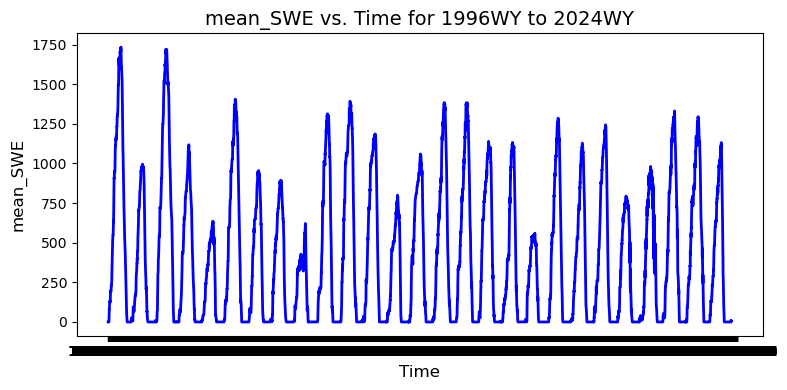

In [24]:
time_period = "1996WY to 2024WY"
var = "mean_SWE"
plot_var(sub_unit_df, var, time_period)

# Plot of Precipitation 

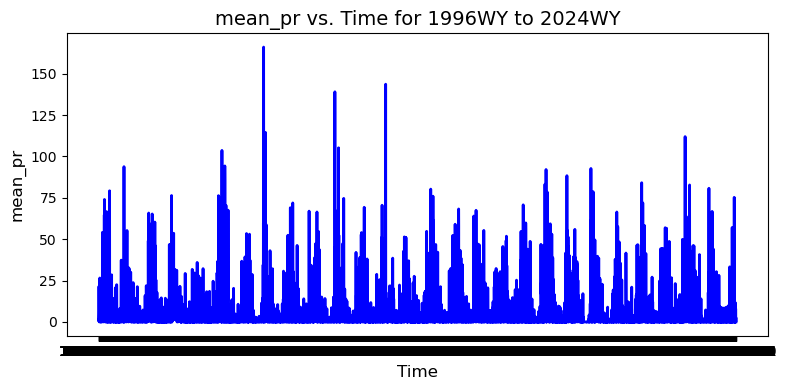

In [25]:
time_period = "1996WY to 2024WY"
var = "mean_pr"
plot_var(sub_unit_df, var, time_period)

# Plot AIR TEMP

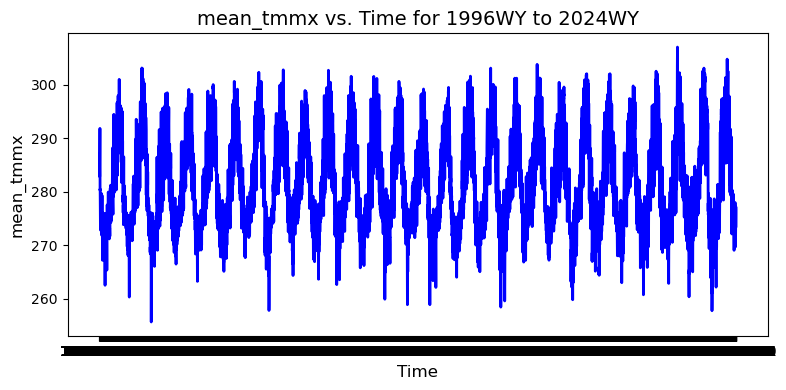

In [26]:
time_period = "1996WY to 2024WY"
var = "mean_tmmx"
plot_var(sub_unit_df, var, time_period)
